# Tutorial 2. Make Probability Distribution Function (PDF)

In [1]:
import numpy as NP
import matplotlib.pyplot as PLT

## 1. Standard  input or numpy.array for callable function
Take the following 1st-order linear function being the example :
$$
 y = ax + b
$$

where $a = 2$ and $b = 1$. Please list the $y$ as function of $x$ with range from -2 ~ 50 with 2 as step

In [2]:
def linear1(x, a=2, b=1):
    """
    y = ax + b
    [input]
        x : number or array-like, input variable
        a : number, gradiant of 1st-order linear function
        b : number, y-shift of 1st-order of linear function
    [output]
        y : number of array-like, a*x + b
    """
    return a*x + b

In [3]:
help(linear1)

Help on function linear1 in module __main__:

linear1(x, a=2, b=1)
    y = ax + b
    [input]
        x : number or array-like, input variable
        a : number, gradiant of 1st-order linear function
        b : number, y-shift of 1st-order of linear function
    [output]
        y : number of array-like, a*x + b



In [4]:
xstep = 2
xmin = -2
xmax = 50

### 1.1. standard input 

In [5]:
xs = []
ys = []
for i in range(int((xmax-xmin)/xstep)+1):
    x = xstep*i+xmin
    xs.append(x)
    ys.append(linear1(x))
print(xs)
print(ys)

[-2, 0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40, 42, 44, 46, 48, 50]
[-3, 1, 5, 9, 13, 17, 21, 25, 29, 33, 37, 41, 45, 49, 53, 57, 61, 65, 69, 73, 77, 81, 85, 89, 93, 97, 101]


### 1.2. numpy solution

In [6]:
xs = NP.arange(xmin, xmax+xstep, xstep)
ys = linear1(xs)
print(xs)
print(ys)

[-2  0  2  4  6  8 10 12 14 16 18 20 22 24 26 28 30 32 34 36 38 40 42 44
 46 48 50]
[ -3   1   5   9  13  17  21  25  29  33  37  41  45  49  53  57  61  65
  69  73  77  81  85  89  93  97 101]


### 1.3 Plot x & y

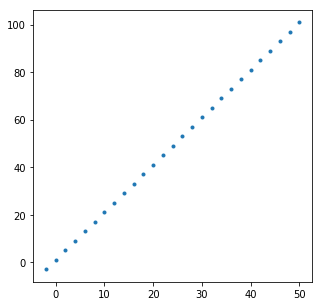

In [7]:
PLT.figure(figsize=[5,5])
PLT.plot(xs, ys, '.')

In [8]:
# HW1. Modify a & b, then plot

## 2. Common PDF 

In [9]:
xs = NP.linspace(-20,20, 100)

In [10]:
def linear2(x, a, b, c):
    return a*x**2 + b*x + c

def linear3(x, a, b, c, d):
    return a*x**3 + b*x**2 + c*x + d

def exponential(x, a, b, c):
    return a*NP.exp(b*x) + c

def exponential_plateau(x, a, b, c):
    return a*(1 - NP.exp(b*x)) + c

def gaussian(x, a, mean, sigma, c):
    #return a*NP.exp(-1*((x - mean)**2/(2*sigma**2)))/(2*NP.pi*sigma**2) + c
    return a * NP.exp( - ((x - mean) / sigma) ** 2) + c

def lognormal(x, a, mean, sigma, c):
    return a*NP.exp(-0.5*((NP.log(x)-mean)/sigma)**2)/x/(sigma*NP.sqrt(2*NP.pi)) + c

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in log


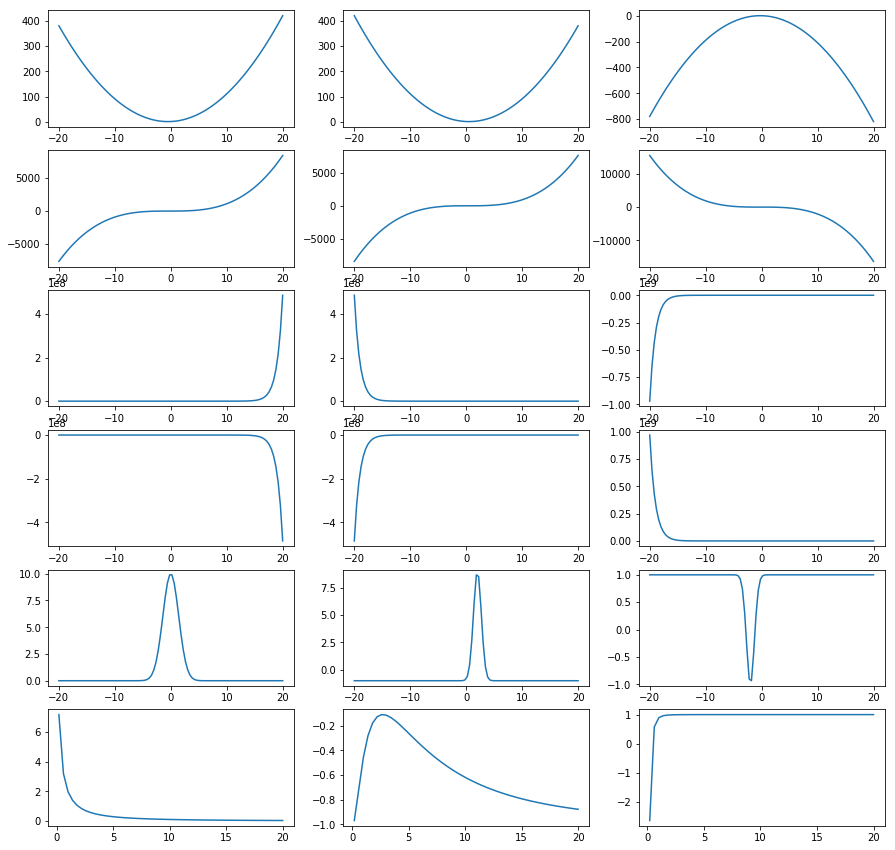

In [11]:
fig, axes = PLT.subplots(nrows=6, ncols=3, figsize=[15,15])
# 2nd order linear
axes[0][0].plot(xs, linear2(xs, 1, 1, 1))
axes[0][1].plot(xs, linear2(xs, 1, -1, 1))
axes[0][2].plot(xs, linear2(xs, -2, -1, 1))
# 3rd order linear
axes[1][0].plot(xs, linear3(xs, 1, 1, 1, 1))
axes[1][1].plot(xs, linear3(xs, 1, -1, 1, 2))
axes[1][2].plot(xs, linear3(xs, -2, -1, 1, -2))
# exponential
axes[2][0].plot(xs, exponential(xs, 1, 1, 1))
axes[2][1].plot(xs, exponential(xs, 1, -1, 1))
axes[2][2].plot(xs, exponential(xs, -2, -1, 1))
# exponential plateau
axes[3][0].plot(xs, exponential_plateau(xs, 1, 1, 1))
axes[3][1].plot(xs, exponential_plateau(xs, 1, -1, 1))
axes[3][2].plot(xs, exponential_plateau(xs, -2, -1, 1))
# gaussian
axes[4][0].plot(xs, gaussian(xs, 10, 0, 2, 0))
axes[4][1].plot(xs, gaussian(xs, 10, 2, 1, -1))
axes[4][2].plot(xs, gaussian(xs, -2, -2, 1, 1))
# lognormal
axes[5][0].plot(xs, lognormal(xs, 10, 0, 2, 0))
axes[5][1].plot(xs, lognormal(xs, 10, 2, 1, -1))
axes[5][2].plot(xs, lognormal(xs, -2, -2, 1, 1))

## 3. Generate pseudo data with Monte Carlo method
The noisy signal distriubtion is combined by decay exponential distribution and gaussian distribution.

### 3.1. Make noisy signal distribution

In [12]:
def noisy_signal(x, s_a, s_mean, s_sigma, s_c, n_a, n_b, n_c):
    return exponential(x, n_a, n_b, n_c) + gaussian(x, s_a, s_mean, s_sigma, s_c)

In [13]:
xs = NP.linspace(0,20,100)
# gaussian signal parameters
s_a = 0.5
s_mean = 10 
s_sigma = 1.5, 
s_c = 0
# exponential noise parameters
n_a = 2 
n_b = -0.1 
n_c = 0
# noisy signal
ys = noisy_signal(xs, s_a, s_mean, s_sigma, s_c, n_a, n_b, n_c )

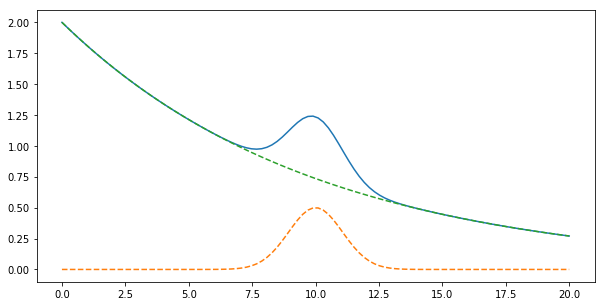

In [14]:
PLT.figure(figsize=[10,5])
PLT.plot(xs, ys)
PLT.plot(xs, gaussian(xs, s_a, s_mean, s_sigma, s_c), '--')
PLT.plot(xs, exponential(xs, n_a, n_b, n_c ), '--')

### 3.2. Generate psuedo data with random function

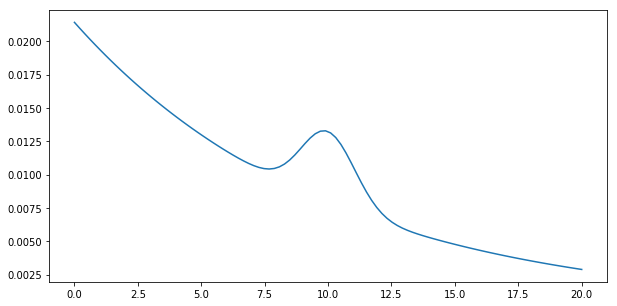

In [15]:
# Normalize distribution to PDF
pdf = ys / ys.sum()
# Draw
PLT.figure(figsize=[10,5])
PLT.plot(xs, pdf)

In [16]:
# generate psuedo data with random function
n_data = 1000
NP.random.seed = 0 
data = NP.random.choice(xs, n_data, p=pdf)

In [17]:
print('Data size : ', len(data))

Data size :  1000


(array([54., 55., 48., 38., 23., 30., 38., 30., 26., 29., 31., 33., 29.,
        19., 13., 19., 25., 18., 24., 19., 24., 22., 25., 19., 31., 30.,
        18., 13., 17., 10., 16., 22., 14., 15., 14., 16.,  6.,  7.,  6.,
         9., 10.,  6.,  8.,  6.,  4.,  7.,  5.,  8.,  7.,  4.]),
 array([ 0. ,  0.4,  0.8,  1.2,  1.6,  2. ,  2.4,  2.8,  3.2,  3.6,  4. ,
         4.4,  4.8,  5.2,  5.6,  6. ,  6.4,  6.8,  7.2,  7.6,  8. ,  8.4,
         8.8,  9.2,  9.6, 10. , 10.4, 10.8, 11.2, 11.6, 12. , 12.4, 12.8,
        13.2, 13.6, 14. , 14.4, 14.8, 15.2, 15.6, 16. , 16.4, 16.8, 17.2,
        17.6, 18. , 18.4, 18.8, 19.2, 19.6, 20. ]),
 <a list of 50 Patch objects>)

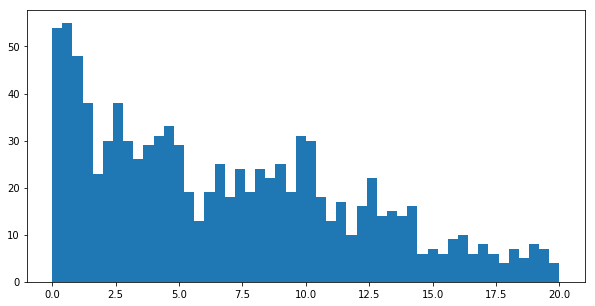

In [18]:
# Make histogram
PLT.figure(figsize=[10,5])
PLT.hist(data, bins=50, range=[0,20])

In [19]:
# generate psuedo data with random function and different size of data
data = []
NP.random.seed = 0 
for n_data in [100, 500, 1000, 5000, 10000, 50000]:
    data.append(NP.random.choice(xs, n_data, p=pdf))

(array([1102., 1011., 1046.,  940., 1011.,  969., 1020.,  945.,  896.,
         866.,  864.,  893.,  848.,  797.,  788.,  781.,  784.,  730.,
         743.,  735.,  720.,  715.,  692.,  698.,  658.,  625.,  639.,
         635.,  607.,  592.,  625.,  584.,  534.,  546.,  530.,  513.,
         525.,  515.,  542.,  504.,  563.,  547.,  563.,  577.,  595.,
         638.,  628.,  625.,  677.,  645.,  691.,  619.,  620.,  570.,
         562.,  488.,  438.,  438.,  404.,  370.,  365.,  327.,  311.,
         297.,  303.,  282.,  273.,  294.,  269.,  279.,  274.,  282.,
         243.,  261.,  247.,  226.,  233.,  226.,  225.,  224.,  198.,
         208.,  190.,  197.,  195.,  195.,  203.,  194.,  188.,  158.,
         176.,  183.,  175.,  163.,  157.,  158.,  147.,  147.,  164.,
         137.]),
 array([ 0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2,  1.4,  1.6,  1.8,  2. ,
         2.2,  2.4,  2.6,  2.8,  3. ,  3.2,  3.4,  3.6,  3.8,  4. ,  4.2,
         4.4,  4.6,  4.8,  5. ,  5.2,  5.4,  5.6,  5.8

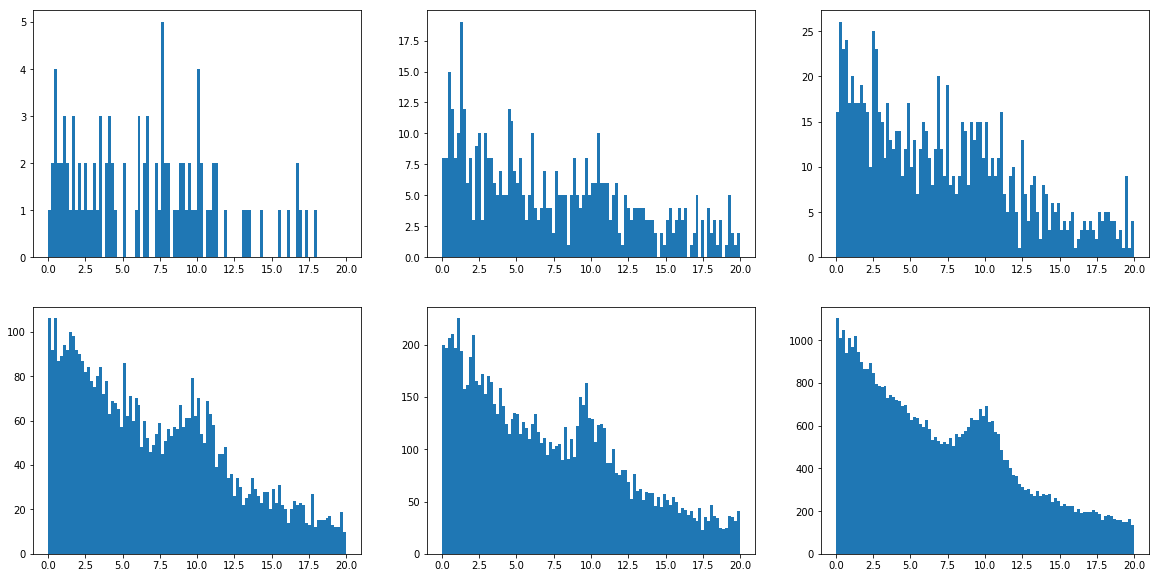

In [20]:
fig, axes = PLT.subplots(nrows=2, ncols=3, figsize=[20,10])
# 2nd order linear
axes[0][0].hist(data[0], bins=100, range=[0,20])
axes[0][1].hist(data[1], bins=100, range=[0,20])
axes[0][2].hist(data[2], bins=100, range=[0,20])
axes[1][0].hist(data[3], bins=100, range=[0,20])
axes[1][1].hist(data[4], bins=100, range=[0,20])
axes[1][2].hist(data[5], bins=100, range=[0,20])